<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before" data-toc-modified-id="Before-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before</a></span></li><li><span><a href="#After" data-toc-modified-id="After-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>After</a></span></li><li><span><a href="#The-Ranges" data-toc-modified-id="The-Ranges-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Ranges</a></span></li><li><span><a href="#Dig-More" data-toc-modified-id="Dig-More-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dig More</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

# Outliners

In [2]:
# ref: http://www.statsmodels.org/stable/datasets/generated/star98.html
star98_df = sm.datasets.star98.load_pandas().data

## Before

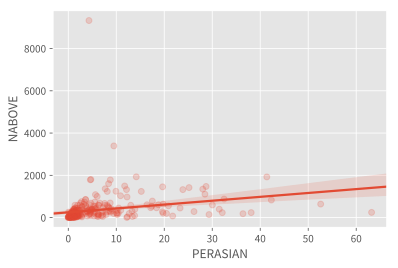

In [3]:
sns.regplot(
    data=star98_df, x='PERASIAN', y='NABOVE',
    scatter_kws={'alpha': 0.2}
)

In [4]:
sp.stats.pearsonr(star98_df.PERASIAN, star98_df.NABOVE)

(0.24430018019697813, 1.7059340444264353e-05)

## After

In [5]:
d = star98_df
display(d.shape)

m = d.mean()
s = d.std()
d = d[(d > m-s*2) & (d < m+s*2)].dropna()
display(d.shape)

star98_df_2 = d

(303, 22)

(184, 22)

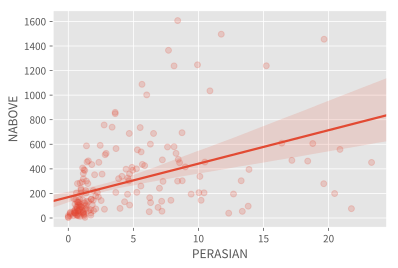

In [6]:
sns.regplot(data=star98_df_2, x='PERASIAN', y='NABOVE', scatter_kws={'alpha': 0.2})

In [7]:
sp.stats.pearsonr(star98_df_2.PERASIAN, star98_df_2.NABOVE)

(0.4428452353418128, 3.080791747334581e-10)

## The Ranges

* $ IQR $: 25–75%.
* $ 2 \sigma $: 2.3–97.7%.
* $ 3 \sigma $: 0.1–99.9%.

## Dig More

* [Scaling data with outliers – Scikit-Learn](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers)